In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score


In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [143]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [144]:
train_data.shape

(891, 12)

In [50]:
test_data.shape

(418, 11)

In [51]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [145]:
train_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked' ], axis=1, inplace=True)

In [146]:
test_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked' ], axis=1, inplace=True)

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [57]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [58]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
train_data.fillna(value=train_data['Age'].mean(), inplace=True)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [148]:
test_data.fillna(value=train_data['Age'].mean(), inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [61]:
train_data["Age"].unique(), train_data["Age"].value_counts()

(array([22.        , 38.        , 26.        , 35.        , 29.69911765,
        54.        ,  2.        , 27.        , 14.        ,  4.        ,
        58.        , 20.        , 39.        , 55.        , 31.        ,
        34.        , 15.        , 28.        ,  8.        , 19.        ,
        40.        , 66.        , 42.        , 21.        , 18.        ,
         3.        ,  7.        , 49.        , 29.        , 65.        ,
        28.5       ,  5.        , 11.        , 45.        , 17.        ,
        32.        , 16.        , 25.        ,  0.83      , 30.        ,
        33.        , 23.        , 24.        , 46.        , 59.        ,
        71.        , 37.        , 47.        , 14.5       , 70.5       ,
        32.5       , 12.        ,  9.        , 36.5       , 51.        ,
        55.5       , 40.5       , 44.        ,  1.        , 61.        ,
        56.        , 50.        , 36.        , 45.5       , 20.5       ,
        62.        , 41.        , 52.        , 63. 

<AxesSubplot:>

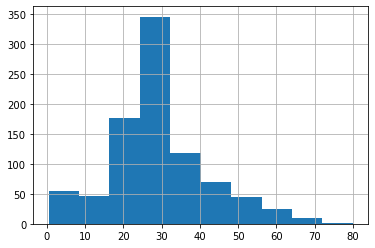

In [62]:
train_data['Age'].hist()

<AxesSubplot:>

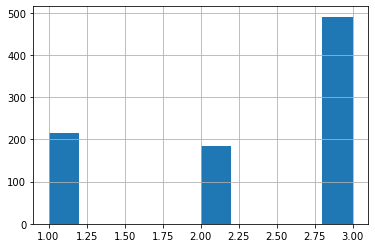

In [63]:
train_data['Pclass'].hist()

In [64]:
plt.bar(train_data["Survived"].value_counts().index


SyntaxError: unexpected EOF while parsing (<ipython-input-64-62d759fbc314>, line 1)

In [ ]:
train_data["Survived"].value_counts()

In [ ]:
print(train_data["Pclass"].unique())
sns.catplot(x="Survived", col="Pclass", kind="count", data=train_data)


In [ ]:
print(train_data["SibSp"].unique())
sns.catplot(x="SibSp", col='Survived', kind="count", data=train_data)
plt.show()

In [ ]:
print(train_data["Parch"].unique())
sns.catplot(x="Parch", col='Survived', kind="count", data=train_data)
plt.show()


In [ ]:
train_data["Parch"].nunique(), train_data["Parch"].value_counts()

In [ ]:
train_data["Fare"].nunique(), train_data["Fare"].value_counts()

In [ ]:
train_data.boxplot(column= ["Fare"])

In [ ]:
train_data.columns


In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [150]:
train_data['Sex']=le.fit_transform(train_data['Sex'])

In [ ]:
train_data.head()

In [151]:
test_data['Sex']=le.fit_transform(test_data['Sex'])

In [ ]:
test_data.head()

In [152]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# enc = OneHotEncoder(handle_unknown='ignore')
# # passing bridge-types-cat column (label encoded values of bridge_types)
# enc_train_data = pd.DataFrame(enc.fit_transform(train_data[['Sex']]).toarray())
# # merge with main df bridge_df on key values
# train_data = train_data.join(enc_train_data)
# train_data


In [ ]:
# train_data_onehot_getdummies = pd.get_dummies(train_data['Sex'], prefix='Sex')
# train_data = pd.concat([train_data_onehot_getdummies,train_data['Sex']],axis = 1)

# train_data.head()

In [153]:
train_data = pd.get_dummies(train_data, columns=["Pclass"])
train_data

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,22.000000,1,0,7.2500,0,0,1
1,2,1,0,38.000000,1,0,71.2833,1,0,0
2,3,1,0,26.000000,0,0,7.9250,0,0,1
3,4,1,0,35.000000,1,0,53.1000,1,0,0
4,5,0,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,27.000000,0,0,13.0000,0,1,0
887,888,1,0,19.000000,0,0,30.0000,1,0,0
888,889,0,0,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0


In [154]:
train_data = pd.get_dummies(train_data, columns=["Sex"])
train_data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0,22.000000,1,0,7.2500,0,0,1,0,1
1,2,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,1,26.000000,0,0,7.9250,0,0,1,1,0
3,4,1,35.000000,1,0,53.1000,1,0,0,1,0
4,5,0,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,0,1,0
888,889,0,29.699118,1,2,23.4500,0,0,1,1,0
889,890,1,26.000000,0,0,30.0000,1,0,0,0,1


In [155]:
test_data = pd.get_dummies(test_data, columns=["Pclass"])
test_data

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,892,1,34.500000,0,0,7.8292,0,0,1
1,893,0,47.000000,1,0,7.0000,0,0,1
2,894,1,62.000000,0,0,9.6875,0,1,0
3,895,1,27.000000,0,0,8.6625,0,0,1
4,896,0,22.000000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,1,29.699118,0,0,8.0500,0,0,1
414,1306,0,39.000000,0,0,108.9000,1,0,0
415,1307,1,38.500000,0,0,7.2500,0,0,1
416,1308,1,29.699118,0,0,8.0500,0,0,1


In [156]:
test_data = pd.get_dummies(test_data, columns=["Sex"])
test_data

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,892,34.500000,0,0,7.8292,0,0,1,0,1
1,893,47.000000,1,0,7.0000,0,0,1,1,0
2,894,62.000000,0,0,9.6875,0,1,0,0,1
3,895,27.000000,0,0,8.6625,0,0,1,0,1
4,896,22.000000,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,29.699118,0,0,8.0500,0,0,1,0,1
414,1306,39.000000,0,0,108.9000,1,0,0,1,0
415,1307,38.500000,0,0,7.2500,0,0,1,0,1
416,1308,29.699118,0,0,8.0500,0,0,1,0,1


In [ ]:
test_data.columns

In [157]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = train_data.iloc[:,2:11] 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [83]:
df.columns=(x.columns)
df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0
1,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,1.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,1.0,0.0
3,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,1.0,0.0
4,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0
887,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,0.0
888,0.367921,0.125,0.333333,0.045771,0.0,0.0,1.0,1.0,0.0
889,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0


In [158]:
test_data

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,892,34.500000,0,0,7.8292,0,0,1,0,1
1,893,47.000000,1,0,7.0000,0,0,1,1,0
2,894,62.000000,0,0,9.6875,0,1,0,0,1
3,895,27.000000,0,0,8.6625,0,0,1,0,1
4,896,22.000000,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,29.699118,0,0,8.0500,0,0,1,0,1
414,1306,39.000000,0,0,108.9000,1,0,0,1,0
415,1307,38.500000,0,0,7.2500,0,0,1,0,1
416,1308,29.699118,0,0,8.0500,0,0,1,0,1


In [159]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = test_data.iloc[:,1:10] 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test_data = pd.DataFrame(x_scaled)

In [160]:
test_data= test_data.set_index(['PassengerId'])
test_data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
PassengerId,,,,,,,,,
892,34.500000,0,0,7.8292,0,0,1,0,1
893,47.000000,1,0,7.0000,0,0,1,1,0
894,62.000000,0,0,9.6875,0,1,0,0,1
895,27.000000,0,0,8.6625,0,0,1,0,1
896,22.000000,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1305,29.699118,0,0,8.0500,0,0,1,0,1
1306,39.000000,0,0,108.9000,1,0,0,1,0
1307,38.500000,0,0,7.2500,0,0,1,0,1


In [88]:
df_test_data.index = test_data.index
df_test_data.columns=(test_data.columns)
df_test_data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
PassengerId,,,,,,,,,
892,0.452723,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0
893,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,1.0,0.0
894,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0
895,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,1.0
896,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1305,0.389412,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0
1306,0.512066,0.000,0.000000,0.212559,1.0,0.0,0.0,1.0,0.0
1307,0.505473,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0


In [86]:
test_data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
PassengerId,,,,,,,,,
892,34.500000,0,0,7.8292,0,0,1,0,1
893,47.000000,1,0,7.0000,0,0,1,1,0
894,62.000000,0,0,9.6875,0,1,0,0,1
895,27.000000,0,0,8.6625,0,0,1,0,1
896,22.000000,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1305,29.699118,0,0,8.0500,0,0,1,0,1
1306,39.000000,0,0,108.9000,1,0,0,1,0
1307,38.500000,0,0,7.2500,0,0,1,0,1


In [167]:
train_data.shape

(891, 11)

In [172]:
train = df.iloc[:,0:9] 
train
test = train_data['Survived']
test

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [139]:
test_data.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_0', 'Sex_1'],
      dtype='object')

In [ ]:
# pred_data = test_data.iloc[:,0:7]
# pred_data


In [173]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2)

In [174]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (712, 9) (712,)
Test set: (179, 9) (179,)


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [176]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [177]:
Survived=LR.predict(test_data) 
#pd.DataFrame(Survived).to_csv("prediction_results.csv")
res = pd.DataFrame(Survived)
res.index = test_data.index # its important for comparison
res.columns = ['Survived']
res.to_csv("prediction_LR.csv")


In [178]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.74, 0.26],
       [0.74, 0.26],
       [0.74, 0.26],
       [0.66, 0.34],
       [0.61, 0.39],
       [0.74, 0.26],
       [0.74, 0.26],
       [0.66, 0.34],
       [0.66, 0.34],
       [0.51, 0.49],
       [0.74, 0.26],
       [0.36, 0.64],
       [0.51, 0.49],
       [0.74, 0.26],
       [0.41, 0.59],
       [0.51, 0.49],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.66, 0.34],
       [0.65, 0.35],
       [0.41, 0.59],
       [0.61, 0.39],
       [0.74, 0.26],
       [0.73, 0.27],
       [0.67, 0.33],
       [0.74, 0.26],
       [0.73, 0.27],
       [0.73, 0.27],
       [0.66, 0.34],
       [0.61, 0.39],
       [0.66, 0.34],
       [0.36, 0.64],
       [0.41, 0.59],
       [0.73, 0.27],
       [0.41, 0.59],
       [0.36, 0.64],
       [0.74, 0.26],
       [0.36, 0.64],
       [0.36, 0.64],
       [0.41, 0.59],
       [0.73, 0.27],
       [0.5 , 0.5 ],
       [0.74, 0.26],
       [0.41, 0.59],
       [0.61, 0.39],
       [0.51, 0.49],
       [0.36, 0.64],
       [0.73,

In [179]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)


0.7463768115942029

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 41  34]
 [  1 103]]


Confusion matrix, without normalization
[[ 41  34]
 [  1 103]]


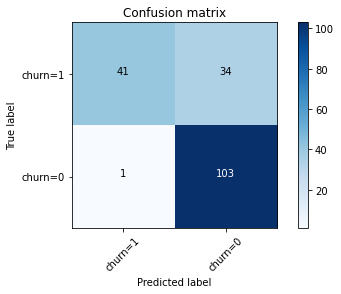

In [181]:
import numpy as np

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[ 26  37]
 [  1 115]]


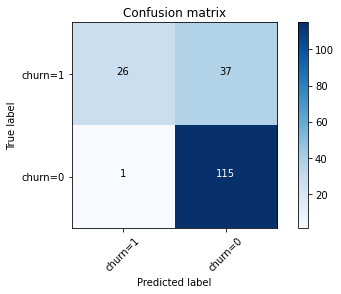

In [99]:
# Compute confusion matrix
import numpy as np
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [182]:

from sklearn.metrics import accuracy_score
print("accuraccy score :",np.round(accuracy_score(y_test,yhat),3))
lr_accurracy = np.round(accuracy_score(y_test,yhat),3)
lr_accurracy 
lr_recall_score = np.round(recall_score(y_test,yhat),3)
lr_recall_score
lr_prec = np.round(precision_score(y_test,yhat),3)
lr_prec
lr_f1 = np.round(f1_score(y_test,yhat),3)
lr_f1

accuraccy score : 0.804


0.701

In [183]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       104
           1       0.98      0.55      0.70        75

    accuracy                           0.80       179
   macro avg       0.86      0.77      0.78       179
weighted avg       0.85      0.80      0.79       179



In [184]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [185]:
dtree.fit(x_train,y_train)
predTree = dtree.predict(x_test)

In [186]:
print (predTree [0:5])
print (y_test [0:5])


[0 0 0 0 0]
26     0
200    0
313    0
148    0
867    0
Name: Survived, dtype: int64


In [187]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8156424581005587


In [188]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predTree)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


In [189]:
print('accuracyscore is    : ',round(accuracy_score(y_test,predTree),3))
dt_accuraccy = round(accuracy_score(y_test,predTree),3)
print('precision is        : ',round(precision_score(y_test,predTree),3))
print('AUc score is        : ',round(roc_auc_score(y_test,predTree),3))
print('recall value is     : ',round(recall_score(y_test,predTree),3))
dt_recall = round(recall_score(y_test,predTree),3)
print('classification report is: \n', classification_report(y_test,predTree))
dt_prec = np.round(precision_score(y_test,predTree),3)
dt_prec
dt_f1 = np.round(f1_score(y_test,predTree),3)
dt_f1
    
print(confusion_matrix(y_test,predTree))
    

accuracyscore is    :  0.816
precision is        :  0.8
AUc score is        :  0.806
recall value is     :  0.747
classification report is: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.80      0.75      0.77        75

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.81       179

[[90 14]
 [19 56]]


In [136]:
train_data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0,22.000000,1,0,7.2500,0,0,1,0,1
1,2,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,1,26.000000,0,0,7.9250,0,0,1,1,0
3,4,1,35.000000,1,0,53.1000,1,0,0,1,0
4,5,0,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,0,1,0
888,889,0,29.699118,1,2,23.4500,0,0,1,1,0
889,890,1,26.000000,0,0,30.0000,1,0,0,0,1


In [190]:
Survived=dtree.predict(test_data) 
pd.DataFrame(Survived).to_csv("prediction_results.csv")
res = pd.DataFrame(Survived)
res.index = test_data.index # its important for comparison
res.columns = ['Survived']
res.to_csv("prediction_dtree.csv")


In [101]:
rf_model=RandomForestClassifier()

accuracyscore is    :  0.816
precision is        :  0.788
AUc score is        :  0.778
recall value is     :  0.651
0.788
classification report is: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.86       116
           1       0.79      0.65      0.71        63

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179

[[105  11]
 [ 22  41]]


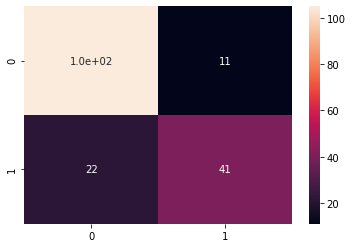

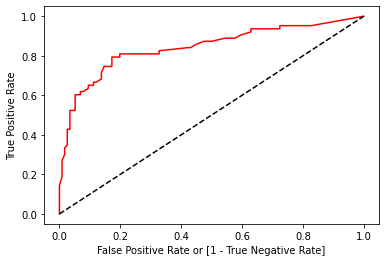

In [102]:
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
rf_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
rf_recall =round(recall_score(y_test,y_pred),3)
rf_prec = np.round(precision_score(y_test,y_pred),3)
rf_f1 = np.round(f1_score(y_test,y_pred),3)
print(rf_prec)
print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
Survived=rf_model.predict(test_data)

In [ ]:
#pd.DataFrame(Survived).to_csv("prediction_results.csv")
res = pd.DataFrame(Survived)
res.index = test_data.index # its important for comparison
res.columns = ['Survived']
res.to_csv("Pred_titanic.csv")


In [191]:
ad_model=AdaBoostClassifier()

accuracyscore is    :  0.844
precision is        :  0.805
AUc score is        :  0.841
recall value is     :  0.827
classification report is: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       104
           1       0.81      0.83      0.82        75

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

[[89 15]
 [13 62]]


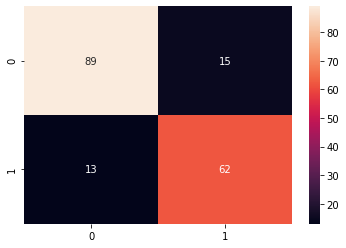

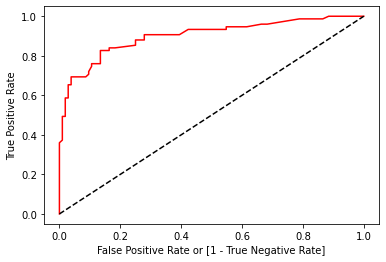

In [193]:
ad_model.fit(x_train,y_train)
y_pred=ad_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
ada_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
ada_recall = round(recall_score(y_test,y_pred),3)
print('classification report is: \n', classification_report(y_test,y_pred))
ada_prec = np.round(precision_score(y_test,y_pred),3)
ada_f1 = np.round(f1_score(y_test,y_pred),3)
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, ad_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [197]:
Survived=ad_model.predict(test_data) 
pd.DataFrame(Survived).to_csv("prediction_results.csv")
res = pd.DataFrame(Survived)
res.index = test_data.index # its important for comparison
res.columns = ['Survived']

res.to_csv("prediction_adboost.csv")


In [194]:
gb_model=GradientBoostingClassifier()

accuracyscore is    :  0.816
precision is        :  0.792
AUc score is        :  0.808
recall value is     :  0.76
classification report is: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       104
           1       0.79      0.76      0.78        75

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

[[89 15]
 [18 57]]


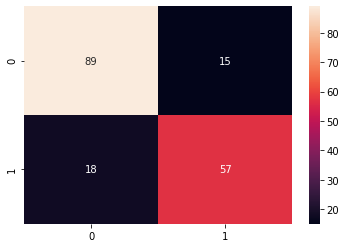

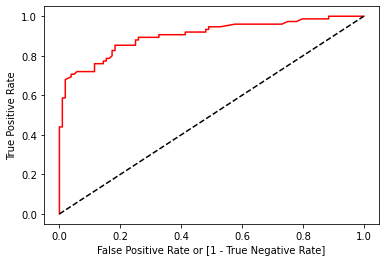

In [195]:
gb_model.fit(x_train,y_train)
y_pred=gb_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
gb_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
gb_recall = round(recall_score(y_test,y_pred),3)
gb_prec = np.round(precision_score(y_test,y_pred),3)
gb_f1 = np.round(f1_score(y_test,y_pred),3)
print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [104]:
kn = KNeighborsClassifier(n_neighbors=11)
results = cross_val_score(kn, x_train, y_train, cv=3)

In [105]:
print("result :",np.round(results.mean(),3))

result : 0.781


In [106]:
# choose k between 1 to 41
k_range = range(0,15)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train, y_train, cv=10)
    k_scores.append(scores.mean())

In [107]:
print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
knn_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
knn_recall = round(recall_score(y_test,y_pred),3)
knn_prec = np.round(precision_score(y_test,y_pred),3)
knn_f1 = np.round(f1_score(y_test,y_pred),3)

print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    

accuracyscore is    :  0.816
precision is        :  0.788
AUc score is        :  0.778
recall value is     :  0.651
classification report is: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.86       116
           1       0.79      0.65      0.71        63

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179

[[105  11]
 [ 22  41]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb = GaussianNB()
gb.fit(x_train,y_train)

In [ ]:
pred_gb = gb.predict(x_test)

In [ ]:
print("accuraccy score :",np.round(accuracy_score(y_test,pred_gb),3))
nbgb_acc = np.round(accuracy_score(y_test,pred_gb),3)
print("recall score :",np.round(recall_score(y_test,pred_gb),3))
nbgb_recall = np.round(recall_score(y_test,pred_gb),3)
print("f1 score :",np.round(f1_score(y_test,pred_gb),3))
print("precision score  :",np.round( precision_score(y_test,pred_gb),3))

nbgb_prec = np.round(precision_score(y_test,pred_gb),3)
nbgb_f1 = np.round(f1_score(y_test,pred_gb),3)


In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test,pred_gb))

In [ ]:
per=((1488  +1701)/(1488  +472+204 +1701))*100
per

In [ ]:
import numpy as np
from sklearn.svm import SVC

In [ ]:
clf = SVC(C= 20, gamma = 52)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
svm_acc = accuracy_score(y_test, y_pred)
print("Accuracy =", svm_acc)
svm_prec = np.round(precision_score(y_test,y_pred),3)
svm_prec
svm_f1 = np.round(f1_score(y_test,y_pred),3)
svm_f1

confusion_matrix(y_test, y_pred)

In [ ]:
print("recall score :",np.round(recall_score(y_test,y_pred),3))
svm_recall = np.round(recall_score(y_test,y_pred),3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB  

In [ ]:
mb = MultinomialNB()
mb.fit(x_train,y_train)

In [ ]:
pred_mb = mb.predict(x_test)

In [ ]:
print("accuraccy score :",np.round(accuracy_score(y_test,pred_mb),3))
nbmb_acc = np.round(accuracy_score(y_test,pred_mb),3)
print("recall score :",np.round(recall_score(y_test,pred_mb),3))
nbmb_recall = np.round(recall_score(y_test,pred_mb),3)
print("f1 score :",np.round(f1_score(y_test,pred_mb),3))
nbmb_prec = np.round(precision_score(y_test,pred_mb),3)
nbmb_prec
nbmb_f1 = np.round(f1_score(y_test,pred_mb),3)
nbmb_f1
print("precision score  :",np.round( precision_score(y_test,pred_mb),3))

In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test,pred_mb))

In [ ]:
data11 = {"Models":pd.Series(["Logistic Regression","Logistic Regression","Decision Tree","SVM","Naive Bayes_multinomial","Naive Bayes_guassian","Random forest",'KNN','adabosting','Gradient boostig']),
          "Accuracy":pd.Series([lr_accurracy,dt_accuraccy,svm_acc,nbmb_acc,nbgb_acc,rf_acc,knn_acc,ada_acc,gb_acc]),"Recall":pd.Series([lr_recall_score,dt_recall,svm_recall,nbmb_recall,nbgb_recall,rf_recall,knn_recall,ada_recall,gb_recall]),
          "Precision":pd.Series([lr_prec,dt_prec,svm_prec,nbmb_prec,nbgb_prec,rf_prec,knn_prec,ada_prec,gb_prec]),
          "F1_Score":pd.Series([lr_f1,dt_f1,svm_f1,nbmb_f1,nbgb_f1,rf_f1,knn_f1,ada_f1,gb_f1])}
table = pd.DataFrame(data11)
table.sort_values(['Accuracy'])

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

In [ ]:
# # print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
# knn_acc = round(accuracy_score(y_test,y_pred),3)
# print('precision is        : ',round(precision_score(y_test,y_pred),3))
# print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
# print('recall value is     : ',round(recall_score(y_test,y_pred),3))
# knn_recall = round(recall_score(y_test,y_pred),3)
# knn_prec = np.round(precision_score(y_test,y_pred),3)
# knn_f1 = np.round(f1_score(y_test,y_pred),3)

# print('classification report is: \n', classification_report(y_test,y_pred))
    
# print(confusion_matrix(y_test,y_pred))
    

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

In [ ]:
# Survived = neigh.predict(test_data)
# Survived[0:5]

In [ ]:

# #pd.DataFrame(Survived).to_csv("prediction_results.csv")
# # res = pd.DataFrame(Survived)
# res.index = test_data.index # its important for comparison
# res.columns = ['Survived']
# res.to_csv("prediction_results.csv")
